In [2]:
import numpy as np
import cv2
import os 
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.applications.vgg16 import VGG16
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from tensorflow.keras import regularizers
import keras.layers.advanced_activations
from tensorflow.python.keras.layers import deserialize, serialize
from tensorflow.python.keras.saving import saving_utils
from tensorflow.keras.models import Model
import torch

print("Done Importing")

Done Importing


In [3]:
images = []
labels = []

#Reading Files
outerFiles = os.listdir('Data')
len(outerFiles)

for i in range(len(outerFiles)):
    #Class Files
    classFiles = os.listdir('Data\\'+outerFiles[i])
    for j in range(len(classFiles)):
        #Image Files
        imageFiles = os.listdir('Data\\'+outerFiles[i]+'\\'+classFiles[j])
        for k in range(len(imageFiles)):
            curImg = cv2.imread('Data\\'+outerFiles[i]+'\\'+classFiles[j]+'\\'+imageFiles[k])
            labels.append(imageFiles[k].split('.')[-2][-1])
            images.append(curImg)
    print(str(i) + '(0, 1) Done', end=" | ")

0(0, 1) Done | 

In [41]:
len(images)

(277524, 277524)

In [3]:
"""
Getting the validation data
"""
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=116)

In [67]:
"""
Storing the number of samples
"""
noOfSamples = []
noOfSamples.append(y_train.count('0'))
noOfSamples.append(y_train.count('1'))

noOfSamples

[158995, 63024]

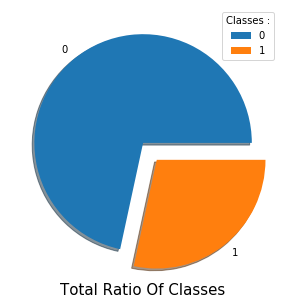

In [68]:
plt.figure(figsize=(20,5))
plt.pie(noOfSamples, labels=['0', '1'], explode = [0, 0.2], shadow=True)
plt.legend(title = "Classes :")
plt.xlabel("Total Ratio Of Classes", fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In [45]:
# X_train = [torch.from_numpy(item).float() for item in X_train]

In [69]:
X_train[0].shape

(50, 50, 3)

In [4]:
"""
Preprocessing image function
"""
def preProcessing(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#     img = cv2.equalizeHist(img)
    img = img/255
    img = cv2.resize(img, (50, 50))
    return img

In [32]:
"""
Try Preprocessing
"""
# img = preProcessing(X_train[1000])
# conv_img = cv2.resize(img, (28, 28))
# cv2.imshow('Not Process Image', cv2.resize(X_train[1000], (28, 28)))
# cv2.waitKey(0)
# cv2.imshow('Preprocessed Image', conv_img)
# cv2.waitKey(0)

'\nTry Preprocessing\n'

In [33]:
# conv_img.shape

In [5]:
"""
Preprocessing image
"""
X_train = np.array(list(map(preProcessing, X_train)))
X_val = np.array(list(map(preProcessing, X_val)))
X_train.shape

(222019, 50, 50)

In [6]:
cv2.imshow('Preprocessed Image', X_train[10])
cv2.waitKey(0)

-1

In [7]:
"""
Reshaping images
"""
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], X_val.shape[2], 1)

In [8]:
"""
Transforming images
"""
dataGen = ImageDataGenerator(width_shift_range=0.1,
                            height_shift_range=0.1,
                            zoom_range=0.2,
                            shear_range=0.1,
                            rotation_range=10,
                            horizontal_flip=True)

dataGen.fit(X_train)

In [80]:
# """
# One Hot Encoding
# """
# # FOR TRAINING DATA
# onehot_train = pd.get_dummies(y_train)
# onehot_train_labels = onehot_train.columns
# y_train_labels = onehot_train.as_matrix()


# # FOR VALIDATION DATA
# onehot_val = pd.get_dummies(y_val)
# onehot_val_labels = onehot_val.columns
# y_val_labels = onehot_val.as_matrix()

In [88]:
# y_train = y_train_labels
# y_val = y_val_labels

In [60]:
y_train[:10]

['1', '1', '0', '0', '0', '0', '0', '0', '0', '0']

## Model

In [42]:
model = tf.keras.models.Sequential([

tf.keras.layers.Conv2D(16, (3,3), input_shape=(50, 50, 1), activation='relu'),
# keras.layers.PReLU(alpha_initializer="zeros"),

# tf.keras.layers.MaxPooling2D(2, 2),

tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
# keras.layers.PReLU(alpha_initializer="zeros"),
# tf.keras.layers.MaxPooling2D(2,2),

tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
# keras.layers.PReLU(alpha_initializer="zeros"),
# tf.keras.layers.MaxPooling2D(2,2),

tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
# keras.layers.PReLU(alpha_initializer="zeros"),
# tf.keras.layers.MaxPooling2D(2,2),

tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
# tf.keras.layers.MaxPooling2D(2,2),

tf.keras.layers.Flatten(),
# 512 neuron hidden layer
tf.keras.layers.Dense(256),
                      
tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='crossentropy', 
                  optimizer=keras.optimizers.Adam(learning_rate=0.0001),
                  metrics=['accuracy'])

ResourceExhaustedError: OOM when allocating tensor with shape[204800,256] and type float on /job:localhost/replica:0/task:0/device:CPU:0 by allocator cpu [Op:Add]

In [ ]:
# model = model
print(model.summary())

In [12]:
y_train_float = np.asarray(y_train).astype(np.float32)
y_val_float = np.asarray(y_val).astype(np.float32)

In [21]:
# batchSizeVal = 20
# epochVal = 18
# stepsPerEpoch = 100

# history = model.fit(dataGen.flow(X_train, y_train_float,
#                                 batch_size=batchSizeVal),
#                                 steps_per_epoch=stepsPerEpoch,
#                                 epochs=epochVal,
#                                 validation_data=(X_val, y_val_float),
#                                 shuffle=1)

In [39]:
batchSizeVal = 20
epochVal = 18
stepsPerEpoch = 100

history = model.fit(X_train, y_train_float,
                                batch_size=batchSizeVal,
                                steps_per_epoch=stepsPerEpoch,
                                epochs=epochVal,
                                shuffle=1)

MemoryError: Unable to allocate 2.07 GiB for an array with shape (222019, 50, 50, 1) and data type float32

In [115]:
y_train_float.shape

(222019,)